In [2]:
#import files
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import DataFrame

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
#read from csv file 
df = pd.read_csv('yeast2.csv')

# 1484 examples; 8 features ; binary class
# show all data, examples and labels
df.head()

,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,class
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,0
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,0
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,0
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,1
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,0


In [30]:
X = df.values[:, 0:8]
y = df.values[:, 8]

In [31]:
len(df)

1484

In [32]:
print(sorted(Counter(y).items()))

[(0.0, 1055), (1.0, 429)]


In [33]:
X

array([[ 0.58,  0.61,  0.47, ...,  0.  ,  0.48,  0.22],
       [ 0.43,  0.67,  0.48, ...,  0.  ,  0.53,  0.22],
       [ 0.64,  0.62,  0.49, ...,  0.  ,  0.53,  0.22],
       ..., 
       [ 0.67,  0.57,  0.36, ...,  0.  ,  0.56,  0.22],
       [ 0.43,  0.4 ,  0.6 , ...,  0.  ,  0.53,  0.39],
       [ 0.65,  0.54,  0.54, ...,  0.  ,  0.53,  0.22]])

In [34]:
y

array([ 0.,  0.,  0., ...,  0.,  1.,  0.])

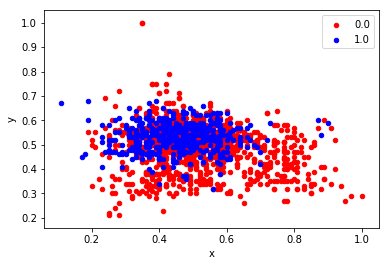

In [35]:
#visualize the data before any work is done
dt = DataFrame(dict(x=X[:,0], y=X[:,2], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = dt.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [36]:
# edited nearest neighbor
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours()
X_res, y_res = enn.fit_resample(X, y)


In [37]:
# number of examples after applying the algorithm
# from 1484 to 1949 
len(X_res)

1049

In [39]:
# of examples for each class
# majority decreased from 1055 to 620
print(sorted(Counter(y_res).items()))

[(0.0, 620), (1.0, 429)]


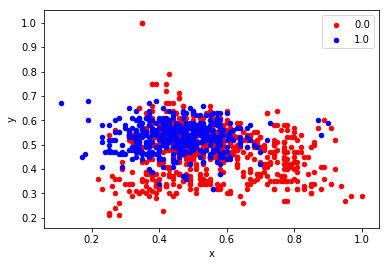

In [40]:
#visualize the data after algorithm is complete
dt = DataFrame(dict(x=X_res[:,0], y=X_res[:,2], label=y_res))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = dt.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()